<a href="https://colab.research.google.com/github/Deepanshu99589/COLAB/blob/main/Optical_mark_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

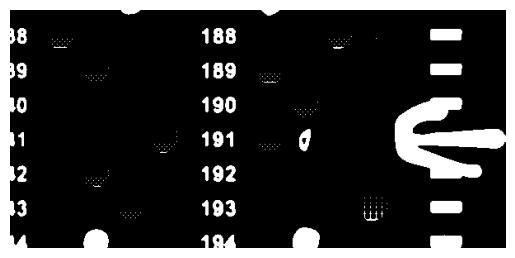

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, threshold = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return threshold

def detect_bubbles(image, x, y, w, h):
    bubbles = []
    bubble_width = w // 5
    bubble_height = h // 5
    bubble_padding = 5

    for i in range(5):
        for j in range(5):
            startX = x + j * bubble_width + bubble_padding
            startY = y + i * bubble_height + bubble_padding
            endX = startX + bubble_width - 2 * bubble_padding
            endY = startY + bubble_height - 2 * bubble_padding
            bubble = (startX, startY, endX, endY)
            bubbles.append(bubble)

    return bubbles

def mark_recognition(image_path):
    image = preprocess_image(image_path)
    contours, _ = cv2.findContours(image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)
        aspect_ratio = w / float(h)
        if 0.9 <= aspect_ratio <= 1.1 and cv2.contourArea(contour) > 500:
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            bubbles = detect_bubbles(image, x, y, w, h)
            for bubble in bubbles:
                (startX, startY, endX, endY) = bubble
                bubbleROI = image[startY:endY, startX:endX]
                total = cv2.countNonZero(bubbleROI)
                cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)
                cv2.putText(image, str(total), (startX - 10, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

# Usage example
mark_recognition("3.jpeg")